<a href="https://colab.research.google.com/github/gabriel-fonseca-repo/iasi/blob/master/src/tc2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro importamos as bibliotecas necessárias para a execução do código:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Definindo a função pra leitura dos dados:

In [ ]:
def carregar_dados_sigmoidais(arquivo: str):
    dados = np.genfromtxt(arquivo, delimiter=",")
    X = dados[:, 0:2]
    y = dados[:, 2].reshape(X.shape[0], 1)
    return (X, y)

Em seguida carregamos os dados do arquivo:

In [ ]:
(X, y) = carregar_dados_sigmoidais("/content/DataAV2.csv")

Fazemos agora uma visualização inicial dos dados:

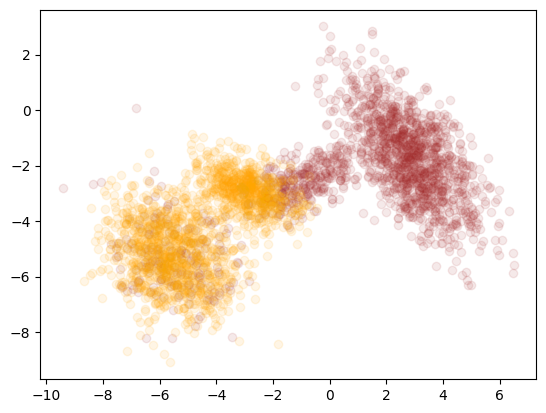

In [ ]:
N, p = X.shape
metade_X = int(N * 0.5)
plt.scatter(X[0:metade_X, 0], X[0:metade_X, 1], color="brown", alpha=0.1)
plt.scatter(X[metade_X:, 0], X[metade_X:, 1], color="orange", alpha=0.1)

Agora preparamos algums dados e variáveis para a execução do treinamento:

In [ ]:
X = X.T
X = np.concatenate((-np.ones((1, N)), X), axis=0)
y.shape = (len(y), 1)
W = np.array([[0], [0], [0]])
x1 = np.linspace(-2, 8, N)
x2 = np.zeros((N,))
LR = 0.01

Explicação linha a linha:
  - `X = X.T` -> Transpomos a matriz `X` (? Perguntar por quê precisarmos transpor a matriz `X`).

  - `X = np.concatenate((-np.ones((1, N)), X), axis=0)` -> (? Perguntar por quê precisamos concatenar uma coluna de uns negativos no início de `X`).

  - `y.shape = (len(y), 1)` -> (? Perguntar por quê precisamos definir o shape de `y` como $len(y) \times 1$).

  - `W = np.array([[0], [0], [0]])` -> Criando o array $W$, vulgo vetor de pesos, mais especificamente o $\theta$, vulgo $W_0$.

  - `x1` e `x2` (? Perguntar ao professor pra quê servem `x1` e `x2`).

  - `LR = 0.01` -> A variával `LR` se trata do learning rate do modelo perceptron, também se referido como $\eta$. É um hyperparâmetro que define a velocidade de aprendizagem do modelo. [Aparentemente o $\eta$ no perceptron simples não afeta seus resultados e é redundante (? Perguntar ao professor)](https://datascience.stackexchange.com/questions/16843/perceptron-learning-rate).

Agora iremos definir primeiramente a função degral, e em seguida o processo de treinamento do modelo:

In [7]:
def sinal(x):
    if x >= 0:
        return 1
    else:
        return -1

In [ ]:
Erro = True
while Erro:
    Erro = False
    for t in range(N):
        x_t = X[:, t].reshape(3, 1)
        u_t = W.T @ x_t

        y_t = sinal(u_t[0, 0])
        d_t = y[t, 0]
        W = W + LR * (d_t - y_t) * x_t
        if (d_t - y_t) != 0:
            Erro = True
            x2 = -x1 * (W[1, 0] / W[2, 0]) + W[0, 0] / W[2, 0]